# ala Python Zusammenfassung

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Grundlagen der Matrizenkonstruktion und Berechnung
## Funktionen in Sympy

In [2]:
# Einheitsmatrix
E = sp.eye(3)
E

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [3]:
# Nullmatrix
O = sp.zeros(3)
O

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [4]:
MO = sp.zeros(4,3)
MO

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [5]:
# Diagonalmatrix erstellen
D = sp.diag(1,2,3)
D

Matrix([
[1, 0, 0],
[0, 2, 0],
[0, 0, 3]])

In [6]:
# Determinante einer Matrix
A = sp.Matrix([[1,5,3],[4,5,6],[7,8,9]])
A.det()

18

## Funktionen in numpy

In [7]:
# Einheitsmatrix
E = np.eye(3)
E

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [8]:
# Nullmatrix
O = np.zeros((3,3))
O

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

# LE1 Eigenvektoren, Eigenwerte, Eigenräume

In [9]:
A = np.array([[2, 5], [8, 10]])
A

array([[ 2,  5],
       [ 8, 10]])

# Eigenwerte und Eigenvektoren bestimmen


In [10]:
eigenwerteA, eigenvektorenA  = np.linalg.eig(A)
display(eigenwerteA, eigenvektorenA)

array([-1.48331477, 13.48331477])

array([[-0.82051622, -0.39921318],
       [ 0.57162325, -0.91685813]])

In [11]:
# beide Eigenvektoren
v1 = eigenvektorenA[:,0]
v2 = eigenvektorenA[:,1]
display(v1, v2)

array([-0.82051622,  0.57162325])

array([-0.39921318, -0.91685813])

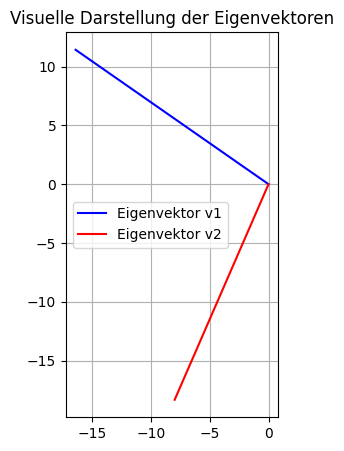

In [12]:
# Eigenvektoren visuell darstellen
plt.figure(figsize=(10,5))
plt.plot([0, v1[0] * 20], [0, v1[1] * 20], 'b', label='Eigenvektor v1')
plt.plot([0, v2[0] * 20], [0, v2[1] * 20], 'r', label='Eigenvektor v2')
plt.grid()
plt.gca().set_aspect("equal")
plt.legend()
plt.title("Visuelle Darstellung der Eigenvektoren")
plt.show()

# Diagonalisierung einer nicht symmetrischen Matrix

In [13]:
B = np.array([[0,0,-2], [1,2,1], [1,0,3]])
B

array([[ 0,  0, -2],
       [ 1,  2,  1],
       [ 1,  0,  3]])

In [14]:
# Eigenwerte und Eigenvektoren bestimmen
eigenwerteB, eigenvektorenB = np.linalg.eig(B)
display(eigenwerteB, eigenvektorenB)

array([2., 1., 2.])

array([[ 0.        , -0.81649658,  0.706555  ],
       [ 1.        ,  0.40824829,  0.03949763],
       [ 0.        ,  0.40824829, -0.706555  ]])

In [15]:
# Eigenvektoren in eine Diagonalmatrix schreiben
D = np.diag(eigenwerteB)
display(D)

array([[2., 0., 0.],
       [0., 1., 0.],
       [0., 0., 2.]])

In [16]:
# Basis der Eigenvektoren
S = eigenvektorenB
S

array([[ 0.        , -0.81649658,  0.706555  ],
       [ 1.        ,  0.40824829,  0.03949763],
       [ 0.        ,  0.40824829, -0.706555  ]])

In [17]:
display(S)

array([[ 0.        , -0.81649658,  0.706555  ],
       [ 1.        ,  0.40824829,  0.03949763],
       [ 0.        ,  0.40824829, -0.706555  ]])

In [18]:
# Inverse der Basis der Eigenvektoren berechnen
Sinv = np.linalg.inv(S)
Sinv

array([[ 1.0559017 ,  1.        ,  1.1118034 ],
       [-2.44948974, -0.        , -2.44948974],
       [-1.41531799, -0.        , -2.83063597]])

In [19]:
# Diagonalisierung von B mit Zusammensetzung der Matrizen S D Sinv = B
Bdiagonal = np.round(S @ D @ Sinv)
Bdiagonal

array([[-0.,  0., -2.],
       [ 1.,  2.,  1.],
       [ 1.,  0.,  3.]])

In [20]:
# Kontrolle auf Richtigkeit mittels elementeweiser Vergleich
np.allclose(B, Bdiagonal)

True

In [21]:
(B == Bdiagonal).all()

True

# Diagonalisieren einer symmetrischen Matrix

In [22]:
M = np.array([[93.,10.,20.],[10.,42.,30.],[20.,30.,56.]])
M


array([[93., 10., 20.],
       [10., 42., 30.],
       [20., 30., 56.]])

In [23]:
# Eigenwerte und Eigenvektoren bestimmen
eigenwerteM, eigenvektorenM = np.linalg.eig(M)
display(eigenwerteM, eigenvektorenM)

array([109.4080777,  63.7115851,  17.8803372])

array([[ 0.80347987,  0.59142826, -0.06806398],
       [ 0.33746861, -0.54665882, -0.76634136],
       [ 0.49044371, -0.5927704 ,  0.63881783]])

In [24]:
# Eigenvektoren absteigend sortieren
eigenvektorenM = eigenvektorenM[:, eigenwerteM.argsort()[::-1]]
display(eigenwerteM, eigenvektorenM)

array([109.4080777,  63.7115851,  17.8803372])

array([[ 0.80347987,  0.59142826, -0.06806398],
       [ 0.33746861, -0.54665882, -0.76634136],
       [ 0.49044371, -0.5927704 ,  0.63881783]])

In [25]:
# Eigenwerte in eine Diagonalmatrix schreiben
D = np.diag(eigenwerteM)
display(D)

array([[109.4080777,   0.       ,   0.       ],
       [  0.       ,  63.7115851,   0.       ],
       [  0.       ,   0.       ,  17.8803372]])

In [26]:
# Basis der Eigenvektoren
S = eigenvektorenM
S

array([[ 0.80347987,  0.59142826, -0.06806398],
       [ 0.33746861, -0.54665882, -0.76634136],
       [ 0.49044371, -0.5927704 ,  0.63881783]])

In [27]:
# Inverse der Basis bestimmen. Da es sich um eine symmetrische Matrix handelt, kann sie dazu transponiert werden
Stransp = S.T
Sinv = np.linalg.inv(S)
np.allclose(Sinv, Stransp)
display(Sinv, Stransp)

array([[ 0.80347987,  0.33746861,  0.49044371],
       [ 0.59142826, -0.54665882, -0.5927704 ],
       [-0.06806398, -0.76634136,  0.63881783]])

array([[ 0.80347987,  0.33746861,  0.49044371],
       [ 0.59142826, -0.54665882, -0.5927704 ],
       [-0.06806398, -0.76634136,  0.63881783]])

In [28]:
# Überprüfen, ob die Basis der Eigenvektoren orthogonal zueinander sind (senkrecht und die Länge 1)
# dazu muss S @ S.T = I ergeben. Dies ist eine Eigenschaft der symmetrischen Matrix
np.round(S @ S.T)

array([[ 1., -0.,  0.],
       [-0.,  1., -0.],
       [ 0., -0.,  1.]])

In [29]:
# Zusammmensetzung aller Matrizen
Mdiagonal = np.round(S @ D @ Sinv)
Mdiagonal

array([[93., 10., 20.],
       [10., 42., 30.],
       [20., 30., 56.]])

In [30]:
# Ueberprüfung, ob M und Mdiagonal gleich sind
#Variante 1
np.allclose(M, Mdiagonal)
# Variante 2
(M == Mdiagonal).all()

True

## Orthogonale Matrix

Eigenschaften einer orthogonalen Matrix:
- Spaltenvektoren stehen senkrecht zueinander
- die Spaltenvektoren sind auf den Betrag 1 normiert
- Spalten und Zeilen bilden die orthonormale Basis (ONB) von R^n.
- die Determinante jeder orthogonalen Matrix ist +1 oder -1 (Schlussfolgerung, dass eine Matrix mit det +1/-1 immer orthogonal ist, gilt nicht!)
- Eigenwerte einer orthogonalen Matrix haben alle den Betrag 1
- jede orthogonale Matrix ist invertierbar -> ![inv_orthog_M.png](./inv_orthog_M.png)
- Produkt zweier orthogonalen Matrizen ist ebenfalls orthogonal
- Transformationen mit orthogonalen Matrizen erhalten die Lànge der Vektoren -> ![transf_orthog_M.png](./transf_orthog_M.png)
- und erhalten Skalarprodukte zwischen zwei Vektoren und deren Zwischenwinkel -> ![skalarprod_orth_M.png](./skalarprod_orth_M.png)

![def_orthogonale_Matrix.png](./def_orthogonale_Matrix.png)


Funktion zur Überprüfung, ob eine Matrix orthogonal ist.

In [31]:
# Matrix erstellen
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
# Funktion, ob die Matrix orthogonal ist
def is_orthogonal(A, tol=1e-8):
    return np.allclose(A.T @ A, np.eye(A.shape[1]), atol=tol)

print(is_orthogonal(A))


False


In [32]:
# Orthogonale Matrix erstellen und überprüfen
B = np.array([[0,1,0],[1,0,0],[0,0,-1]])
print(is_orthogonal(B))

True


In [33]:
Q = np.array([
    [1/np.sqrt(2), 1/np.sqrt(2), 0],
    [-1/np.sqrt(2), 1/np.sqrt(2), 0],
    [0, 0, 1]
])

Q

array([[ 0.70710678,  0.70710678,  0.        ],
       [-0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [34]:
print(np.dot(Q, Q.T))

[[1.00000000e+00 2.23711432e-17 0.00000000e+00]
 [2.23711432e-17 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [35]:
# Frobeniusnorm der Matrix berechnen
Q_norm = np.linalg.norm(Q, 'fro') # Verwendung der Frobenius-Norm
Q_norm

1.7320508075688772

In [36]:
# Matrix auf den Betrag 1 normieren. Hier wird jede Komponente der Matrix durch die Frobeniusnorm geteilt. Dadurch entsteht die normalisierte Matrix
Q_normalized = Q / Q_norm
Q_normalized

array([[ 0.40824829,  0.40824829,  0.        ],
       [-0.40824829,  0.40824829,  0.        ],
       [ 0.        ,  0.        ,  0.57735027]])

In [37]:
print(is_orthogonal(Q))

True


## Drehmatrix
Funktion zum drehen einer Matrix

In [38]:
# Matrix drehen
#Funktion, um eine Matrix zu drehen

def matrix_drehen(matrix, winkel):
    # Winkel in Bogenmass und cosinus, sinus umwandeln
    c, s = np.cos(np.radians(winkel)), np.sin(np.radians(winkel))
    # Hülle für das Ergebnis erstellen
    gedrehte_matrix = np.zeros_like(matrix)
    # Anzal n, m auslesen
    n, m = matrix.shape

    # for-loop erstellen
    for i in range(n):
        for j in range(m):
            x = i * c + j * s
            y = -i * s + j * c
            gedrehte_matrix[int(x)][int(y)] = matrix[i][j]
    # Rückgabewert
    return gedrehte_matrix

print(matrix_drehen(B, 180))

[[ 0  0  0]
 [ 0  0  0]
 [ 1 -1  0]]


In [39]:
print(matrix_drehen(A, 120))

[[4 9 7]
 [3 0 6]
 [0 0 0]]


# LE2 Vertiefung lineare Abbildungen und Matrizenalgebra
## Bild und Kern einer linearen Abbildung


In [40]:
# Die Abbildungsmatrix erstellen (mit sympy)
A = sp.Matrix([[1,2,-1],[0,1,1],[1,1,-2]])
display(A)
A

Matrix([
[1, 2, -1],
[0, 1,  1],
[1, 1, -2]])

Matrix([
[1, 2, -1],
[0, 1,  1],
[1, 1, -2]])

In [41]:
# Matrix in Zeilenstufenform bringen. Die Zeilen, die keine Nullzeilen sind, bilden die Basis.
A_rref = sp.Matrix(A).rref()
A_rref

(Matrix([
 [1, 0, -3],
 [0, 1,  1],
 [0, 0,  0]]),
 (0, 1))

In [42]:
# Basis mit sympy erstellen
B = sp.Matrix([[0,1],[1,0],[0,1]])
display(B)
B

Matrix([
[0, 1],
[1, 0],
[0, 1]])

Matrix([
[0, 1],
[1, 0],
[0, 1]])

In [43]:
# Matrix in Zeilenstufenform bringen und Kolonnen mit Pivotelementen
rref, pivot_columns = A.rref()
rref

Matrix([
[1, 0, -3],
[0, 1,  1],
[0, 0,  0]])

In [44]:
# Kolonnen mit Pivotelementen ausgeben
pivot_columns

(0, 1)

In [45]:
# Symbole für die spätere Verwendung erstellen
x, y, z, = sp.symbols("x y z")

## Kern einer Matrix
Der Kern einer Matrix ist die Menge aller Vektoren x, die mit der Matrix berechnet: M @ x = 0 den Nullvektor ergibt.
Wir bestimmen die Menge aller Vektoren x.

In [46]:
print(A.nullspace())

[Matrix([
[ 3],
[-1],
[ 1]])]


In [47]:
print(B.nullspace())

[]


Mit einem Gleichungssystem der Matrix A wird dies folgendermassen berechnet:

In [48]:
eq1 = 1 * x + 2 * y - 1 * z
eq2 = 0 * x + 1 * y + 1 * z
eq3 = 1 * x + 1 * y - 2 * z
lsg = sp.solve([eq1, eq2, eq3], [x, y, z], manual = True)
lsg

[(3*z, -z, z)]

In [49]:
# mit der Matrix B
eq1 = 0 * x + 1 * y
eq2 = 1 * x + 0 * y
eq3 = 0 * x + 1 * y
lsg = sp.solve([eq1, eq2, eq3], [x, y], manual = True)
lsg

{y: 0, x: 0}

## Bild einer Matrix
Das Bild einer Matrix besteht aus unabhängigen Vektoren. Es sind auch die Vektoren, welche bei der reduzierten Zeilenstufenform die Pivotelemente enthalten. Die Vektoren des Bildes können auch mittels Codefolge erstellt werden.

In [50]:
# Matrix transponieren
AT = A.T
AT

# auf transponierte Matrix Gauss-Jordan anwenden
AT_rref = AT.rref()[0]
AT_rref

# AT_rref wieder zurück transponieren
A_im = AT_rref.T
A_im

# das Bild als Matrix ausgeben
A_image = A_im[ : , :2]
A_image

Matrix([
[1,  0],
[0,  1],
[1, -1]])

## Matrix mit sich selbst multiplizieren
potenzieren einer Matrix

In [51]:
# Matrix erstellen
A = np.array([[89, 75, 22, 102], [75,116,27,120],[22,27, 33, 62],[102, 120, 62, 200]])
A

array([[ 89,  75,  22, 102],
       [ 75, 116,  27, 120],
       [ 22,  27,  33,  62],
       [102, 120,  62, 200]])

In [52]:
# Matrix 20 mal mit sich selbst multiplizieren
A20 = np.linalg.matrix_power(A, 20)
A20

array([[-1309691574,  -321205363,  -330188191,  -690532502],
       [ -321205363, -1632026314,  1726152085, -1078007836],
       [ -330188191,  1726152085,   -73443078,   372346786],
       [ -690532502, -1078007836,   372346786,   978017080]])

In [53]:
# Version 2 mit der diagonalisierten Matrix
# Inverse der Matrix erstellen
ew, ev = np.linalg.eig(A)
V = ev
V
# Inverse von V
Vinv = np.linalg.inv(V)
Vinv

# Diagonalmatrix erstellen
D = np.round(Vinv.dot(A).dot(V), 5)
D

array([[361.75382,   0.     ,  -0.     ,   0.     ],
       [  0.     ,  42.74593,  -0.     ,   0.     ],
       [ -0.     ,   0.     ,  26.33719,  -0.     ],
       [  0.     ,   0.     ,  -0.     ,   7.16306]])

In [54]:
A20 = Vinv @ D ** 20 @ V
A20

array([[ 2.66754183e+50,  2.66279855e+50, -4.79342615e+50,
         1.45433470e+50],
       [ 2.66279855e+50,  2.65806371e+50, -4.78490274e+50,
         1.45174868e+50],
       [-4.79342615e+50, -4.78490274e+50,  8.61352351e+50,
        -2.61335957e+50],
       [ 1.45433470e+50,  1.45174868e+50, -2.61335957e+50,
         7.92898312e+49]])

In [55]:
sp.Matrix(A20)

Matrix([
[ 2.66754182546707e+50, 2.66279854838322e+50, -4.79342614599283e+50,  1.45433469649987e+50],
[ 2.66279854838321e+50, 2.65806370553544e+50, -4.78490273759699e+50,  1.45174867802687e+50],
[-4.79342614599283e+50,  -4.784902737597e+50,  8.61352350607083e+50, -2.61335957047511e+50],
[ 1.45433469649987e+50, 1.45174867802687e+50, -2.61335957047512e+50,  7.92898311565568e+49]])

## Exponentialfunktion einer Matrix
Matrix mit sich selbst multiplizieren
Eigenschaften:
- Exponentieren wir die Nullmatrix, so erhalten wir die Einheitsmatrix -> e^0 = I
- die Transponierte vertauscht ![exp_transp_vertauscht.png](./exp_transp_vertauscht.png)
- es gilt det(e^A) = e^spur(A)

In [56]:
M = np.array([[0,5],[-1,6]])
M

array([[ 0,  5],
       [-1,  6]])

In [57]:
ewM, evM = np.linalg.eig(M)
ewM

array([1., 5.])

In [58]:
evM

array([[-0.98058068, -0.70710678],
       [-0.19611614, -0.70710678]])

In [59]:
# Alle Matrizen erstellen
D = np.diag(ewM)
S = evM
S_inv = np.linalg.inv(S)
display(D, S, S_inv)

array([[1., 0.],
       [0., 5.]])

array([[-0.98058068, -0.70710678],
       [-0.19611614, -0.70710678]])

array([[-1.27475488,  1.27475488],
       [ 0.35355339, -1.76776695]])

In [60]:
# Überprüfen, ob die Rekonstruktion die Ursprungsmatrix ergibt
M_recon = np.round(S @ D @ S_inv)
display(M)

array([[ 0,  5],
       [-1,  6]])

In [61]:
# Überprüfen mit Vergleichsoperator
(M == M_recon).all()

True

Um e^A auszurechnen, müssen die Eigenwerte modifiziert werden.

In [62]:
e_hoch_ew = np.exp(ewM)
eD = np.diag(e_hoch_ew)
display(eD)

array([[  2.71828183,   0.        ],
       [  0.        , 148.4131591 ]])

In [63]:
# um e^A zu berechnen, werden alle Matrizen benutzt
e_hoch_M = np.round(S @ eD @ S_inv)
display(e_hoch_M)

array([[-34., 182.],
       [-36., 185.]])

In [64]:
# Version 2 mit Funktion von scipy
from scipy.linalg import expm
e_M_check = np.round(expm(M))
display(e_M_check)

array([[-34., 182.],
       [-36., 185.]])

In [65]:
# Kontrolle, ob die beiden Resultate dieselben sind
(e_M_check == e_hoch_M).all()

True

# LE 3 Basistransformationen
## Basistransformationen von Vektoren

![Basistransformation_vektor.png](./Basistransformation_vektor.png)

In [66]:
# Vektor in der Standardbasis
vector = np.array([[1.],[2.],[3.]])
vector

array([[1.],
       [2.],
       [3.]])

In [67]:
# Standardbasis erstellen
Basis = np.array([[1,0,0],[0,2,0],[0,0,3]])
Basis

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [68]:
# Inverse der Standardbasis erstellen
Basis_inv = np.linalg.inv(Basis)
Basis_inv

array([[1.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        ],
       [0.        , 0.        , 0.33333333]])

In [69]:
# Basistransformation durchführen
vector_B = Basis_inv @ vector
print(vector_B)

[[1.]
 [1.]
 [1.]]


### Basistransformationen von Matrizen
![Basistransformation_matrix.png](./Basistransformation_matrix.png)

In [70]:
# Abbildungsmatrix erstellen
A = np.array([[1, 0], [-1, 2]])
A

array([[ 1,  0],
       [-1,  2]])

In [71]:
# Basis / Transformationsmatrix erstellen
Basis = np.array([[2, 0], [1, 2]])
Basis

array([[2, 0],
       [1, 2]])

In [72]:
# Inverse der Basis / Transformationsmatrix erstellen
Basis_inv = np.linalg.inv(Basis)
Basis_inv


array([[ 0.5 ,  0.  ],
       [-0.25,  0.5 ]])

In [73]:
# Basistransformation einer Abbildungsmatrix durchführen
Ab = Basis_inv @ A @ Basis
Ab

array([[ 1. ,  0. ],
       [-0.5,  2. ]])

## Eigenbasis
Manchmal macht es Sinn, in eine Eigenbasis zu wechseln, um ein Problem einfacher darstellen zu können.
Z.B. um Mischterme los zu werden.
Um von einer Matrix in die Eigenbasis zu kommen, werden folgende Schritte durchlaufen:

In [74]:
# Matrix erstellen
A = np.array([
    [3,2,4],
    [2,0,2],
    [4,2,3]
    ])
A

array([[3, 2, 4],
       [2, 0, 2],
       [4, 2, 3]])

In [75]:
# Eigenwerte und Eigenvektoren bestimmen
ew, ev = np.linalg.eig(A)
display(ew,ev)

array([-1.,  8., -1.])

array([[-0.74535599,  0.66666667, -0.20756326],
       [ 0.2981424 ,  0.33333333, -0.77602137],
       [ 0.59628479,  0.66666667,  0.59557394]])

In [76]:
# Basis erstellen aus den Eigenvektoren (mit normalisierten Eigenvektoren)
B = ev
B
T = B
T

array([[-0.74535599,  0.66666667, -0.20756326],
       [ 0.2981424 ,  0.33333333, -0.77602137],
       [ 0.59628479,  0.66666667,  0.59557394]])

In [77]:
# Inverse der Basis erstellen
T_inv = np.linalg.inv(T)
T_inv

array([[-0.74535599,  0.55747669,  0.46661765],
       [ 0.66666667,  0.33333333,  0.66666667],
       [-0.        , -0.93126488,  0.46563244]])

In [78]:
Ab = T_inv @ A @ T
print(np.round(Ab))

[[-1.  0. -0.]
 [-0.  8. -0.]
 [ 0.  0. -1.]]


Quadratische Form und Basistransformation einer Matrix mit der Eigenbasis


In [79]:
# Vektoren und Matrix definieren für die quadratische Form
vector = np.array([
    [x],
    [y],
    [z]
])
vector

array([[x],
       [y],
       [z]], dtype=object)

In [80]:
# Vektor transponieren
vector_T = vector.T
vector_T

array([[x, y, z]], dtype=object)

In [81]:
# Matrix erstellen
A = np.array([
    [3,2,4],
    [2,0,2],
    [4,2,3]
    ])
A

array([[3, 2, 4],
       [2, 0, 2],
       [4, 2, 3]])

In [82]:
# die allgemeine quadratische Form berechnen
sp.simplify(vector_T @ A @ vector)

[[3*x**2 + 4*x*y + 8*x*z + 4*y*z + 3*z**2]]

In [83]:
# das Resultat vereinfachen, indem die Eigenbasis mit der Matrix multipliziert wird
ew, ev = np.linalg.eig(A)
Basis = ev
display(ew)
display(Basis)
Basis_inv = np.linalg.inv(Basis)
display(Basis_inv)


array([-1.,  8., -1.])

array([[-0.74535599,  0.66666667, -0.20756326],
       [ 0.2981424 ,  0.33333333, -0.77602137],
       [ 0.59628479,  0.66666667,  0.59557394]])

array([[-0.74535599,  0.55747669,  0.46661765],
       [ 0.66666667,  0.33333333,  0.66666667],
       [-0.        , -0.93126488,  0.46563244]])

In [84]:
# Basistransformation durchführen
Ab = np.round(Basis_inv @ A @ Basis)
Ab

array([[-1.,  0., -0.],
       [-0.,  8., -0.],
       [ 0.,  0., -1.]])

In [85]:
sp.simplify(vector_T @ Ab @ vector)

[[-1.0*x**2 + 8.0*y**2 - 1.0*z**2]]

## Hauptkomponentenanalyse (PCA) -> Aufgabe

In [86]:
# Messpunkte erstellen
x = [-2, -4, -6, 6, -8, 6, 3, 6, 8, -9, -1, 1, 4, 2, 2, 2, -1, -1, 2, 2]
y = [-3, -7, -13, 16, -14, 14, 6, 11, 18, -19, 5, 0, 3, 3, 6, 8, -3, -1, 0, 9]

# Standardisierte Messpunkte erstellen
x = (np.array(x) - np.mean(x)) / np.std(x)
y = (np.array(y) - np.mean(y)) / np.std(y)

# Matrix erstellen
X = np.array([x,y])
print(X.shape)
X

(2, 20)


array([[-0.57091174, -1.01007461, -1.44923749,  1.18573976, -1.88840036,
         1.18573976,  0.52699545,  1.18573976,  1.62490264, -2.1079818 ,
        -0.3513303 ,  0.08783258,  0.74657689,  0.30741401,  0.30741401,
         0.30741401, -0.3513303 , -0.3513303 ,  0.30741401,  0.30741401],
       [-0.51124062, -0.92436435, -1.54404995,  1.45109711, -1.64733088,
         1.24453524,  0.41828778,  0.93469244,  1.65765897, -2.16373555,
         0.31500685, -0.20139782,  0.10844498,  0.10844498,  0.41828778,
         0.62484964, -0.51124062, -0.30467875, -0.20139782,  0.72813058]])

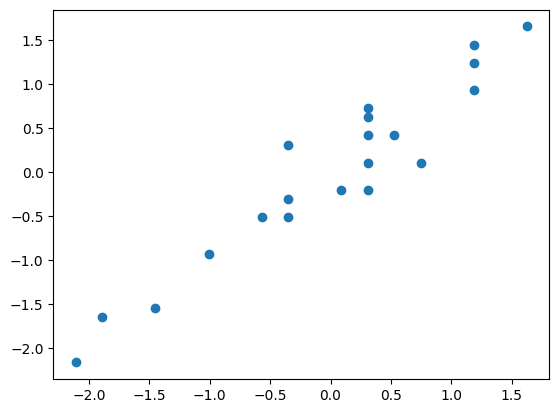

In [87]:
# visuelle Darstellung der Messpunkte
plt.scatter(X[0,:], X[1,:])

In [88]:
# quadratische Form berechnen
XXT = X @ X.T
XXT

array([[20.        , 19.10896792],
       [19.10896792, 20.        ]])

In [89]:
# Eigenwerte und Eigenvektoren berechnen
ew, ev = np.linalg.eig(XXT)
display(ew, ev)

array([ 0.89103208, 39.10896792])

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [90]:
# Eigenwerte absteigend sortieren
ew = np.sort(ew)[::-1]

# Variante 2
ew = sorted(ew, reverse=True)
display(ew)

# Eigenvektoren der Grösse nach sortieren
ev = ev[:, np.argsort(ew)[::-1]]
display(ev)

# einzelne Eigenvektoren extrahieren
ev1 = ev[:,0]
ev2 = ev[:,1]


[39.10896791545882, 0.8910320845411768]

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

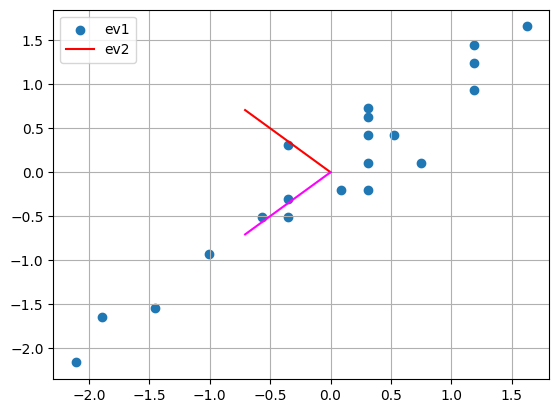

In [91]:
# visuell darstellen
plt.scatter(X[0,:], X[1,:])
plt.plot([0, ev1[0]], [0, ev1[1]], color='red')
plt.plot([0, ev2[0]], [0, ev2[1]], color='magenta')
plt.grid()
plt.legend(['ev1', 'ev2'])
plt.show()

In [92]:
# Messwerte transformieren mit der Eigenbasis von XXT
eigenbasis = ev
eigenbasis_inv = np.linalg.inv(eigenbasis)

Xb = eigenbasis_inv @ X

y_b = Xb[0,:] # erste Zeile
x_b = Xb[1,:] # zweite Zeile

Xb

array([[ 0.04219385,  0.06060631, -0.06704253,  0.18763598,  0.17046187,
         0.04157468, -0.07686793, -0.17751726,  0.02316223, -0.03942385,
         0.47117151, -0.20451677, -0.4512274 , -0.14069235,  0.07839959,
         0.22446089, -0.11307367,  0.03298763, -0.3597843 ,  0.29749154],
       [ 0.76519727,  1.36785491,  2.11657384, -1.86452523,  2.50013954,
        -1.71846394, -0.66841618, -1.49937199, -2.32112158,  3.0205603 ,
         0.02568456,  0.08030275, -0.60459176, -0.29405671, -0.51314866,
        -0.65920995,  0.60992975,  0.46386845, -0.07496477, -0.7322406 ]])

In [93]:
# Eigenvektoren von Xb berechnen
ewXb, evXb = np.linalg.eig(Xb @ Xb.T)
v1 = evXb[:,0]
v2 = evXb[:,1]

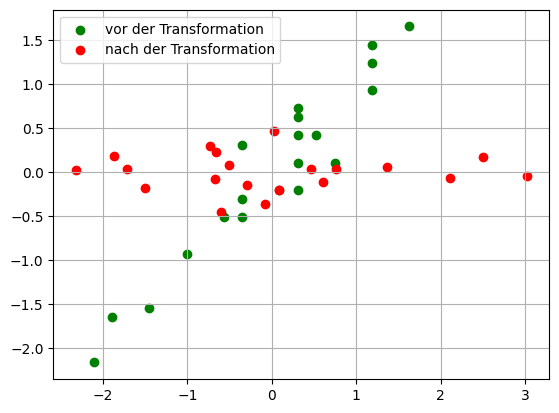

In [94]:
# visuell darstellen
plt.scatter(X[0,:], X[1,:], color='green', label = "vor der Transformation")
plt.scatter(x_b, y_b, color='red', label = "nach der Transformation")
plt.legend()
plt.grid()
plt.show()

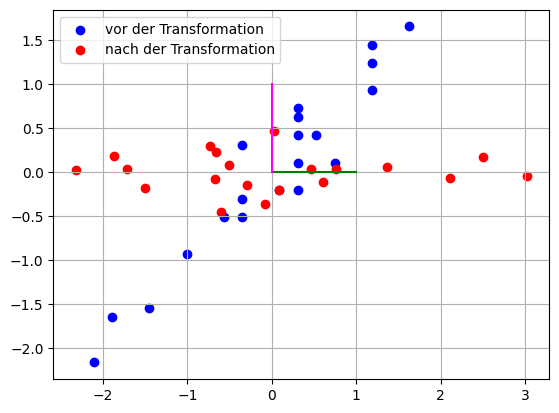

In [95]:
# Visualisierung der Eigenvektoren von Xb @ Xb.T
plt.scatter(X[0, :], X[1, :], color = "blue", label = "vor der Transformation")
plt.scatter(x_b, y_b, color = "red", label = "nach der Transformation")
plt.plot([0, v1[0]], [0, v1[1]], color = "green")
plt.plot([0, v2[0]], [0, v2[1]], color = "magenta")
plt.legend()
plt.grid()
plt.show()

In [96]:
# Rücktransformation der komprimierten Daten
x = X[0,:]
x

array([-0.57091174, -1.01007461, -1.44923749,  1.18573976, -1.88840036,
        1.18573976,  0.52699545,  1.18573976,  1.62490264, -2.1079818 ,
       -0.3513303 ,  0.08783258,  0.74657689,  0.30741401,  0.30741401,
        0.30741401, -0.3513303 , -0.3513303 ,  0.30741401,  0.30741401])

In [97]:
# y eliminieren und mit 0 auffüllen
Z_x = np.vstack([x, np.zeros_like(x)])
Z_x

array([[-0.57091174, -1.01007461, -1.44923749,  1.18573976, -1.88840036,
         1.18573976,  0.52699545,  1.18573976,  1.62490264, -2.1079818 ,
        -0.3513303 ,  0.08783258,  0.74657689,  0.30741401,  0.30741401,
         0.30741401, -0.3513303 , -0.3513303 ,  0.30741401,  0.30741401],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [98]:
# Transformation mit der Eigenbasis von XXT
Z = eigenbasis_inv @ Z_x
display(Z)

array([[ 0.40369556,  0.71423061,  1.02476566, -0.83844463,  1.3353007 ,
        -0.83844463, -0.37264206, -0.83844463, -1.14897967,  1.49056823,
         0.24842804, -0.06210701, -0.52790958, -0.21737453, -0.21737453,
        -0.21737453,  0.24842804,  0.24842804, -0.21737453, -0.21737453],
       [ 0.40369556,  0.71423061,  1.02476566, -0.83844463,  1.3353007 ,
        -0.83844463, -0.37264206, -0.83844463, -1.14897967,  1.49056823,
         0.24842804, -0.06210701, -0.52790958, -0.21737453, -0.21737453,
        -0.21737453,  0.24842804,  0.24842804, -0.21737453, -0.21737453]])

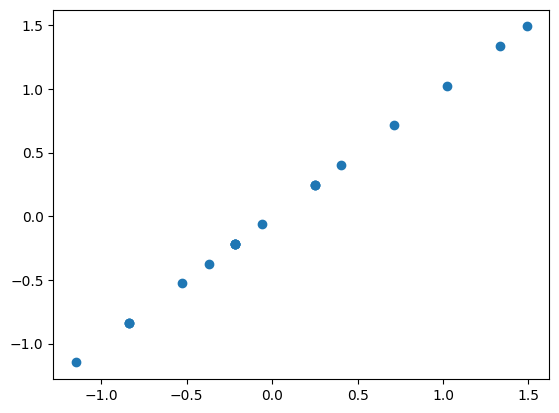

In [99]:
# Visuelle Darstellung
plt.scatter(Z[0,:], Z[1,:])
plt.show()

# LE 4 Normen und Ähnlichkeitsmasse



In [100]:
# Vektor definieren
v = np.array([0,2,-1]).reshape(3,1)
v

array([[ 0],
       [ 2],
       [-1]])

In [160]:
# Matrix erstellen
M = np.array([
    [0,0,-2],
    [1,2,1],
    [1,0,3]
])
M

array([[ 0,  0, -2],
       [ 1,  2,  1],
       [ 1,  0,  3]])

In [161]:
# maximales Matrixelement
np.max(M)

3

In [162]:
np.max(np.abs(M))

3

In [163]:
# prüfen der Symmetrie
MTM = M.T @ M
display(MTM)

array([[ 2,  2,  4],
       [ 2,  4,  2],
       [ 4,  2, 14]])

In [164]:
np.max(MTM)

14

## Normen berechnen
Jede dieser Normen bietet eine unterschiedliche Sicht auf die "Größe" oder "Länge" des gegebenen Vektors oder der gegebenen Matrix, und welche man verwenden sollte, hängt vom spezifischen Kontext und den spezifischen Anforderungen des Problems ab, das man zu lösen versucht.

## Vektornormen
### L1-Norm oder Manhattan-Norm

In [103]:
# Berechnet die L1-Norm (auch bekannt als Manhattan-Norm) eines Vektors v, die gleich der Summe der absoluten Werte seiner Elemente ist.
display(np.linalg.norm(v, ord=1))

3.0

## L2-Norm oder Euklidische Norm

In [104]:
# Berechnet die L2-Norm (auch bekannt als Euklidische Norm) eines Vektors v, die gleich der Quadratwurzel der Summe der Quadrate seiner Elemente ist.
display(np.linalg.norm(v, ord=2))

2.23606797749979

## L∞-Norm oder Maximumsnorm

In [105]:
# Berechnet die L∞-Norm (auch bekannt als Maximumsnorm) eines Vektors v, die gleich dem Maximum seiner absoluten Werte ist.
display(np.linalg.norm(v, ord=np.inf))

2.0

# Operatornormen
Matrizennormen können auf zwei Arten definiert werden: Einerseits können wir eine m x n-Matrix in einen
Vektor in R^mxn umwandeln und dann ganz normal die  **Vektornormen**
darauf anwenden. Andererseits können wir auch wie in der Einführung motiviert eine Matrizennorm über
die Wirkung der Matrix auf Vektoren definieren, deswegen spricht man hier auch von **Operatornormen**


## L1-Norm oder Spaltensummennorm

In [106]:
# Berechnet die L1-Norm einer Matrix M, auch bekannt als die maximale Spaltensummennorm, d.h., sie berechnet die maximalen absoluten Spaltensummen.
display(np.linalg.norm(M, ord=1))

6.0

## L2-Norm oder Spektralnorm

In [107]:
# Berechnet die L2-Norm oder Spektralnorm einer Matrix M, auch bekannt als die größte Singulärzahl der Matrix.
display(np.linalg.norm(M, ord=2))

3.968118785068667

## L∞-Norm oder Zeilensummennorm / Gesamtnorm

In [108]:
# Berechnet die L∞-Norm einer Matrix M, auch bekannt als die maximale Zeilensummennorm, d.h., sie berechnet die maximalen absoluten Zeilensummen.
display(np.linalg.norm(M, ord=np.inf))

4.0

In [109]:
# Berechnet die Frobenius-Norm einer Matrix M, die gleich der Quadratwurzel der Summe der Quadrate ihrer Elemente ist.
display(np.linalg.norm(M, ord='fro'))

4.47213595499958

In [110]:
# Funktion für alle Elemente als Betrag hoch einer Potenz, Aufsummieren und Wurzel ziehen
def norm(M, p):
    return np.sum(np.abs(M)**p)**(1/p)

norm(v, 5)

2.0123466170855586

In [111]:
# Funktion für die Summe aller Elemente als Betrag einer Matrix
def summennorm(M):
    return np.max(np.sum(np.abs(M), axis=0))
summennorm(M)

6

In [112]:
# Berechnen der Quadratwurzel aus der Spur der Matrix
sum(np.diag(M.T @ M))**0.5

4.47213595499958

In [113]:
# Funktion für die Gesamtnorm einer Matrix
def get_gesamtnorm(M: np.array) -> float:
    return (M.shape[0] * M.shape[1]) ** 0.5 * np.max(np.abs(M))
get_gesamtnorm(M)

9.0

In [114]:
# Maximaler WErt einer Spaltensumme der Matrix
np.linalg.norm(M, ord=1)

6.0

In [115]:
# Spektralnorm von M: Wurzel aus dem größten Eigenwert von M.T @ M
np.linalg.norm(MTM, ord=2)

15.745966692414838

In [116]:
# Version 2
np.linalg.norm(M, ord=2)**2

15.745966692414834

In [117]:
# Zeilennorm: Maximale Zeilensumme
np.linalg.norm(M, ord=np.inf)

4.0

## Distanz
![Distanz.png](./Distanz.png)

In [118]:
v1 = np.array([1,0,-1]).reshape(3,1)
v2 = np.array([1,2,0]).reshape(3,1)

## Euklidische Distanz

In [119]:
# euklidische Distanz
np.linalg.norm(v1 - v2, ord = 2)

2.23606797749979

## Manhattan Distanz

In [120]:
np.linalg.norm(v1 - v2, ord = 1)

3.0

## Maximum Distanz


In [121]:
np.linalg.norm(v1 - v2, ord = np.inf)

2.0

# Ähnlichkeitsmasse


In [122]:
v1 = np.array([1,0,-1]).reshape(3,1)
v2 = np.array([1,2,0]).reshape(3,1)

In [123]:
# Cosinus-Aehnlichkeit (Cosin-similarity)
(v1.T @ v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

array([[0.31622777]])

In [124]:
# Korrelations-Ähnlichkeit
x = (0.9, -1.0, 0.7, -1.9, 0.9, -1.7, 0.3, -1.6, -2.7, 0.6)
y = (-0.5, -0.1, -0.6, -0.1, -2.5, -2.2, 1.1, 0.6, 0.6, 0.2)

# Korrelationsmatrix erstellen
np.corrcoef(x,y)

array([[ 1.        , -0.21678238],
       [-0.21678238,  1.        ]])

In [125]:
# Jaccard-Ähnlichkeit (Binär)
x = [1, 1, 0, 0, 1, 0, 1]
y = [0, 1, 1, 0, 1, 0, 1]

In [126]:
# Funktion für Jaccard-Ähnlichkeit
def jaccard_binary(x,y):
    schnittmenge = np.logical_and(x,y)
    vereinigung = np.logical_or(x, y)
    return schnittmenge.sum() / vereinigung.sum()

In [127]:
schnittmenge = np.logical_and(x,y)
schnittmenge

array([False,  True, False, False,  True, False,  True])

In [128]:
vereinigung = np.logical_or(x, y)
vereinigung

array([ True,  True,  True, False,  True, False,  True])

In [129]:
jaccard_binary(x,y)

0.6

# LE 5 Transfer auf Machine Learning - Algorithmen
Alles essenzielle Wissen von LE 5

## Lineare Regression
![lineare_regression.png](./lineare_regression.png)


In [130]:
w = np.array(
    [(0.0, 3.8), (1.0, 3.9), (2.0, 5.4), (3.0, 6.5), (4.0, 6.1), (5.0, 10.5), (6.0, 10.3), (7.0, 12.6),
     (8.0, 12.1), (9.0, 14.4), (10.0, 14.7)] )
display(w)

x = w[ : , 0]
y = w[ : , 1]

array([[ 0. ,  3.8],
       [ 1. ,  3.9],
       [ 2. ,  5.4],
       [ 3. ,  6.5],
       [ 4. ,  6.1],
       [ 5. , 10.5],
       [ 6. , 10.3],
       [ 7. , 12.6],
       [ 8. , 12.1],
       [ 9. , 14.4],
       [10. , 14.7]])

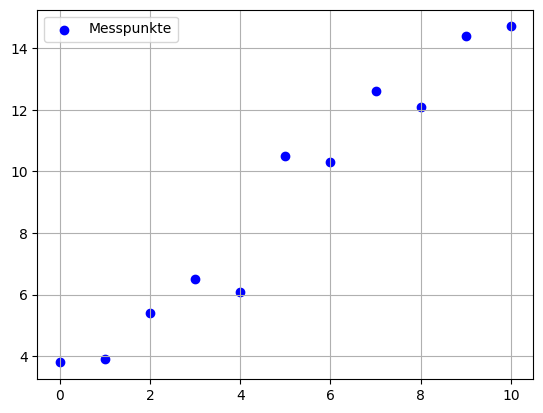

In [131]:
# Visuelle Darstellung der Punkte
plt.scatter(x, y, color = "b", label = "Messpunkte")
plt.grid()
plt.legend()
plt.show()

In [132]:
# Matrix A erstellen
ones = np.ones(len(x)).reshape(-1,1)
x_A = x.reshape(-1,1)

A = np.hstack([ones, x_A,])
display(A)

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [133]:
# Matrix (Vektor) b erstellen
b = y.reshape(-1,1)

![normalengleichung.png](./normalengleichung.png)

In [134]:
# Normalengleichung durchfuheren
x_v = np.linalg.inv(A.T @ A) @ (A.T @ b)
x_v

array([[3.07272727],
       [1.20909091]])

In [135]:
# Interpretation vom x_v Vektor
achsenabschnitt = x_v[0]
steigung_x = x_v[1]

display(achsenabschnitt, steigung_x)

array([3.07272727])

array([1.20909091])

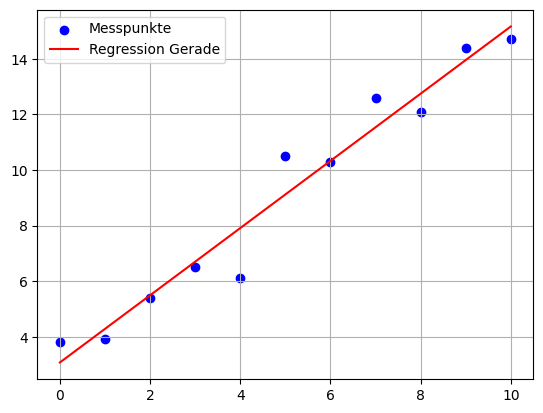

In [136]:
# Visuelle Darstellung der Punkte mit der Gerade
values = np.linspace(min(x), max(x), 2)
plt.scatter(x, y, color = "b", label = "Messpunkte")
plt.plot(values, achsenabschnitt + steigung_x * values, c = "r", label = "Regression Gerade")
plt.plot()
plt.grid()
plt.legend()
plt.show()

# Mutliple lineare Regression

In [137]:
w = np.array(
    [(0.0, 3.8, 3.8), (1.0, 3.9, 3.9), (2.0, 5.4, 10.8), (3.0, 6.5, 19.5), (4.0, 6.1, 24.5), (5.0, 10.5, 50.8),
     (6.0, 10.3, 61), (7.0, 12.6, 84), (8.0, 12.1, 96), (9.0, 14.4, 130), (10.0, 14.7, 147)] )
display(w)

x = w[ : , 0]
y = w[ : , 1]
z = w[ : , 2]

array([[  0. ,   3.8,   3.8],
       [  1. ,   3.9,   3.9],
       [  2. ,   5.4,  10.8],
       [  3. ,   6.5,  19.5],
       [  4. ,   6.1,  24.5],
       [  5. ,  10.5,  50.8],
       [  6. ,  10.3,  61. ],
       [  7. ,  12.6,  84. ],
       [  8. ,  12.1,  96. ],
       [  9. ,  14.4, 130. ],
       [ 10. ,  14.7, 147. ]])

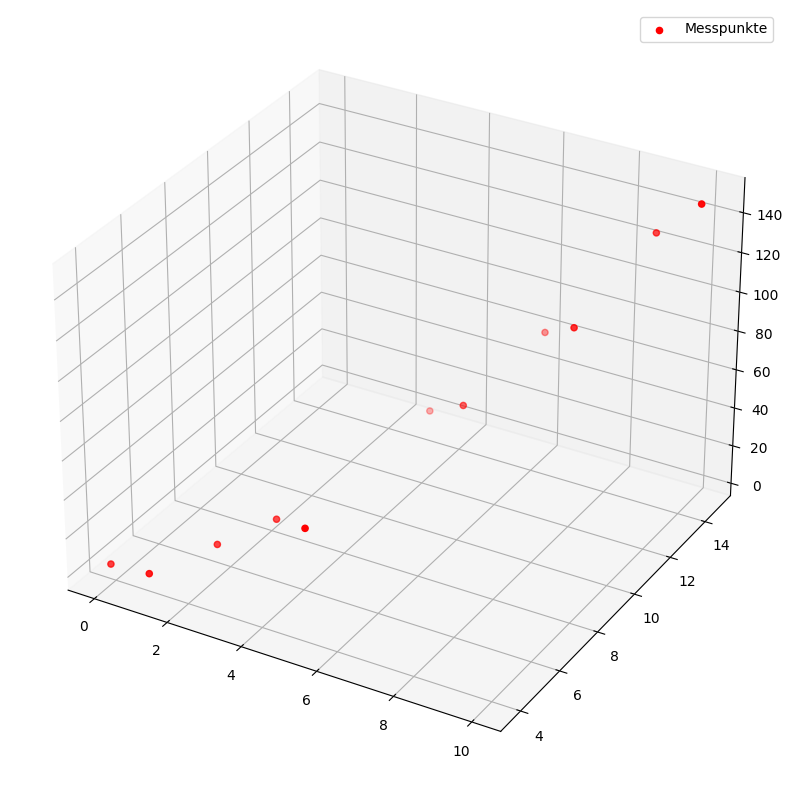

In [138]:
# Visuelle Darstellung der Punkte
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c = "r", label = "Messpunkte")
plt.legend()
plt.grid()
plt.show()

In [139]:
# Matrix A und b definieren
ones = np.ones(len(x)).reshape(-1,1)
x_A = x.reshape(-1,1)
y_A = y.reshape(-1,1)
A = np.hstack([ones, x_A, y_A])

b = z.reshape(-1,1)

In [140]:
# Normalengleichung durchfuheren (Nach Vektor x aufloesen)
x_v = np.linalg.inv(A.T @ A) @ (A.T @ b)
x_v

array([[-31.96251549],
       [  9.12275143],
       [  4.7969725 ]])

In [141]:
# Interpreation von Vektor x_v
achsenabschnitt = x_v[0]
steigung_x = x_v[1]
steigung_y = x_v[2]

display(achsenabschnitt, steigung_x, steigung_y)

array([-31.96251549])

array([9.12275143])

array([4.7969725])

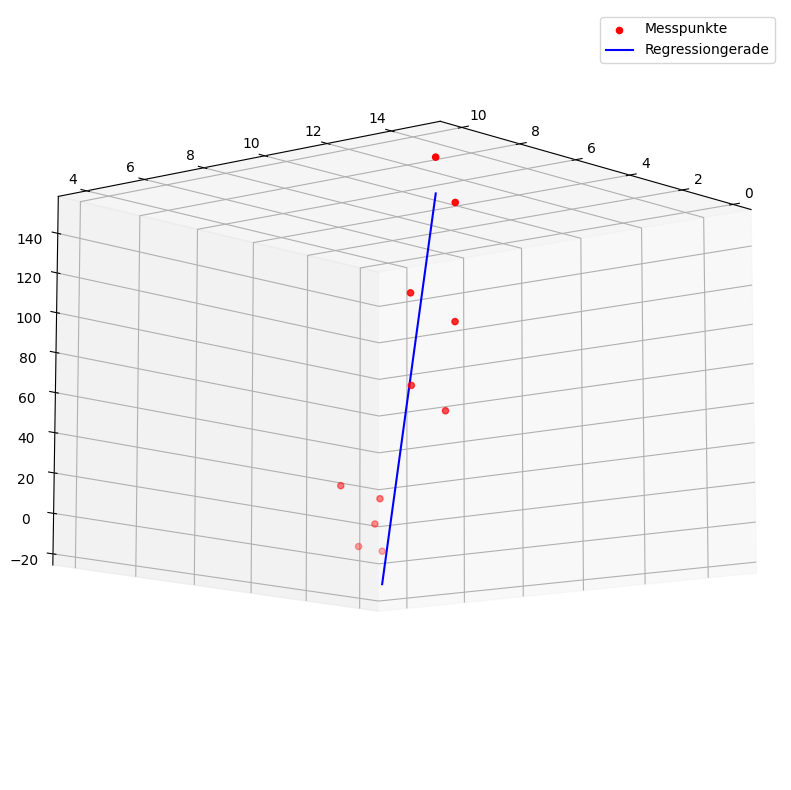

In [142]:
# Visuelle Darstellung von Punkten und Gerade
values_x = np.linspace(min(x), max(x), 2)
values_y = np.linspace(min(y), max(y), 2)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c = "r", label = "Messpunkte")
ax.plot(values_x, values_y, achsenabschnitt + steigung_x * values_x + steigung_y * values_y, c = "b", label = "Regressiongerade")
ax.view_init(azim=0, elev=90) # Vogelperspektive
ax.view_init(-10,40)
plt.legend()
plt.grid()
plt.show()

# Singulärwertzerlegung

In [143]:
M = np.array([[10,20,30],[69,420,360],[5,42,70]])
M

array([[ 10,  20,  30],
       [ 69, 420, 360],
       [  5,  42,  70]])

## Singularwertzerlegung durchführen

In [144]:
U, S, VT = np.linalg.svd(M)
S = np.diag(S)
display(U, S, VT)

array([[-0.06338763,  0.32673631, -0.94298748],
       [-0.98844328, -0.15092952,  0.01414751],
       [-0.13770215,  0.93298642,  0.33252738]])

array([[563.96162596,   0.        ,   0.        ],
       [  0.        ,  27.38723139,   0.        ],
       [  0.        ,   0.        ,   6.87197227]])

array([[-0.12327962, -0.74862793, -0.65142794],
       [-0.0906204 , -0.6452001 ,  0.75862031],
       [-0.98822572,  0.15255508,  0.01169906]])

In [145]:
# Zusammenhang Eigenwerte und Singulaerwerte einer Matrix
np.linalg.eigvals(M.T@ M) ** 0.5

array([563.96162596,   6.87197227,  27.38723139])

In [146]:
# Matrix M rekonstruieren mit Rang k
k = 1
M_recon = U[ : , :k] @ S[ :k , :k ] @ VH[:k , :]
M_recon

array([[  4.40702357,  26.76209556,  23.2873718 ],
       [ 68.72149335, 417.31820678, 363.13465136],
       [  9.57373818,  58.13749169,  50.58906473]])

In [147]:
# Distanzen zwischen 2 Matrizen berechnen
np.linalg.norm(M - M_recon, ord = "fro")

28.236225776055058

In [148]:
# Matrizen vertauschen
np.linalg.norm(M_recon - M, ord = "fro")

28.236225776055058

In [149]:
np.linalg.norm(M_recon - M, ord = 2)

27.387231390293532

# Konditionszahl einer Matrix
Bei der Konditionszahl einer Matrix handelt es sich um ein Maß für die Empfindlichkeit der Lösung eines linearen Gleichungssystems Ax = b gegenüber Störungen in den Koeffizienten von A und b.
Die Konditionszahl k(kappa) berechnet sich wie folgt:
![konditionszahl.png](./konditionszahl.png)
und stellt somit das Verhältnis im Betrag zwischen dem grössten und dem kleinsten Eigenwert dar.
Gegeben sind folgende Matrizen:
![matrix_a_kappa.png](./matrix_a_kappa.png)

In [150]:
# Matrix A erstellen
A = np.array([
    [-7,4,4],
    [4,-1,8],
    [4,8,-1]
])
A = (1/9)*A
A

array([[-0.77777778,  0.44444444,  0.44444444],
       [ 0.44444444, -0.11111111,  0.88888889],
       [ 0.44444444,  0.88888889, -0.11111111]])

In [151]:
# Matrix B erstellen
B = np.array([
    [1,0,-1],
    [0,4,-3],
    [-1,-3,20]
])
B

array([[ 1,  0, -1],
       [ 0,  4, -3],
       [-1, -3, 20]])

In [152]:
# Funktion kappa(A) erstellen
def kappa(A):
    eigenwerte = np.linalg.eigvals(A)
    lambda_max = max(abs(eigenwerte))
    lambda_min = min(abs(eigenwerte))
    return lambda_max / lambda_min


In [153]:
# Konditionszahl von Matrix A berechnen
kappa(A)

1.0000000000000002

In [154]:
# Konditionszahl von Matrix B berechnen
kappa(B)

21.95516850022584

In [155]:
lambda_max_A = max(abs(np.linalg.eigvals(A)))
lambda_max_A

1.0

In [156]:
is_orthogonal(A)

True

In [157]:
is_orthogonal(B)

False